In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## About the Dataset

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.


## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='Drug'>

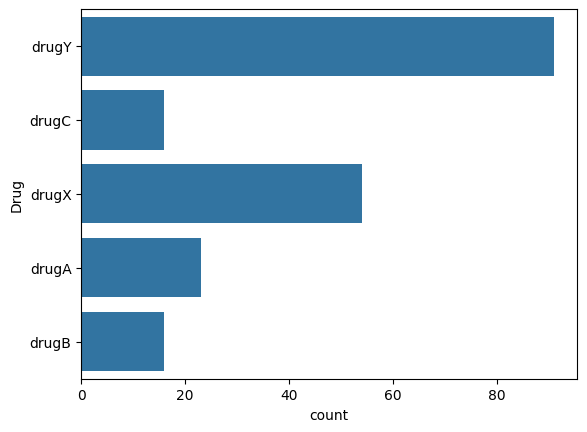

In [3]:
import seaborn as sns
sns.countplot(my_data['Drug'])

Maximum people are exposed to DrugY, following by DrugX. DrugC is applied to the least amount of people

In [4]:
my_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
## Checking null values
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No null values are recorded in any features

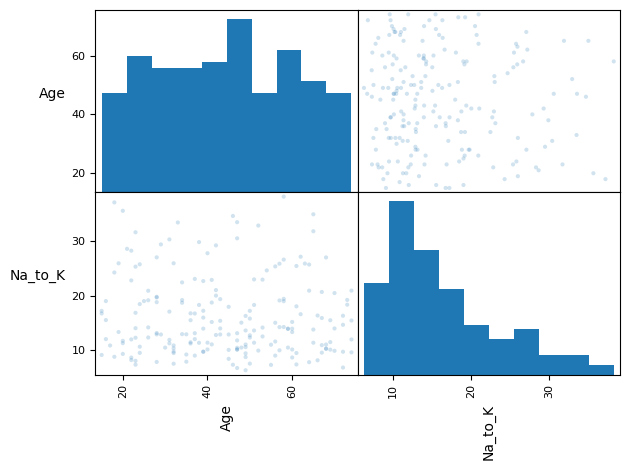

In [6]:
axes = pd.plotting.scatter_matrix(my_data,alpha=0.2)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')


plt.tight_layout()
plt.gcf().subplots_adjust(wspace = 0, hspace = 0)
plt.show()

In [7]:
# Lable encoder 
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])


In [8]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


- Sex = {F:0, M:1}
- BP = {High:0, Low: 1, Normal:2}
- Cholesterol = {High:0, Normal:1}

## Custom Mapping

In [9]:
mapping = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}

my_data['Drug_num'] = my_data['Drug'].map(mapping)

In [10]:
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


In [11]:
my_data.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [12]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
 6   Drug_num     200 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.1+ KB


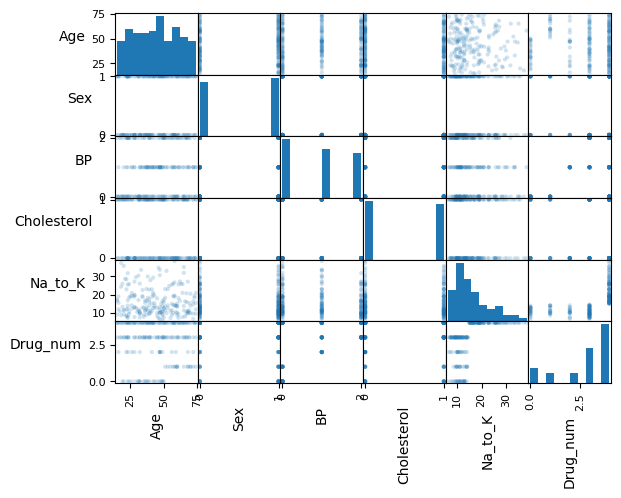

<Figure size 3000x2400 with 0 Axes>

In [13]:
axes = pd.plotting.scatter_matrix(my_data,alpha=0.2)


for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.figure(figsize = (30,24))
plt.tight_layout()
plt.gcf().subplots_adjust(wspace = 0, hspace = 0)
plt.show()

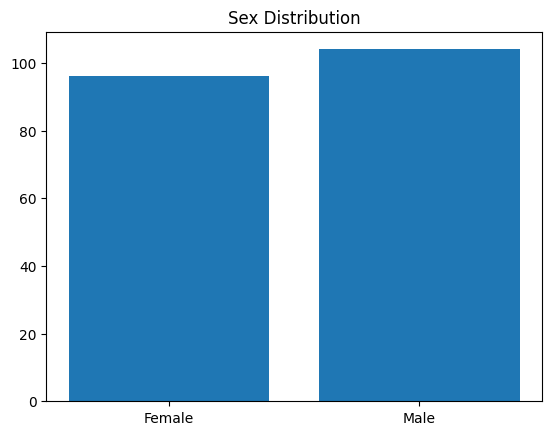

In [14]:
counts = my_data['Sex'].value_counts().sort_index()

labels = ['Female', 'Male']

plt.bar(labels, counts)
plt.title("Sex Distribution")
plt.show()

In [18]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Drug_num'], dtype='object')

In [19]:
my_data.drop('Drug', axis = 1).corr()['Drug_num']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug_num       1.000000
Name: Drug_num, dtype: float64

In [20]:
y = my_data['Drug']
X = my_data.drop(['Drug', 'Drug_num'], axis = 1)

In [21]:
X.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

# Mdoelling

In [22]:
## splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)



In [23]:
X_train.shape,X_test.shape

((140, 5), (60, 5))

In [34]:
drugtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [35]:
drugtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
## Evaluation 
tree_predictions = drugtree.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print(f"Decision tree accuracy: {accuracy_score(y_test, tree_predictions)}")

Decision tree accuracy: 1.0


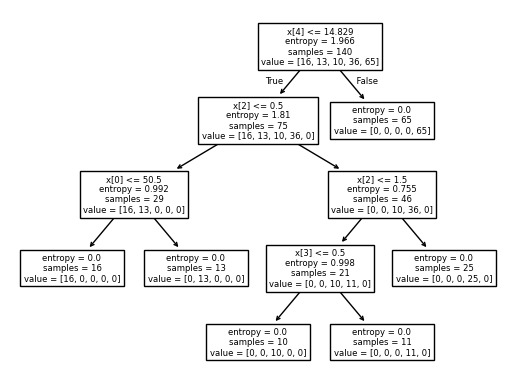

In [38]:
from sklearn.tree import plot_tree

plot_tree(drugtree)
plt.show()

## Regression Tree

## Importing Libraries

In [39]:
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

## Dataset Analysis

Each row in the dataset represents a taxi trip. As shown above, each row has 13 variables. One of the variables is `tip_amount` which will be the target variable. Your objective will be to train a model that uses the other variables to predict the value of the `tip_amount` variable.


In [41]:
# read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
taxitip_raw_data = pd.read_csv(url)
taxitip_raw_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


In [42]:
taxitip_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [43]:
taxitip_raw_data['VendorID'].unique()

array([2])

In [52]:
taxitip_raw_data = taxitip_raw_data.drop(['VendorID','payment_type'], axis = 1)

In [53]:
taxitip_raw_data.columns

Index(['passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'fare_amount', 'mta_tax',
       'tolls_amount', 'improvement_surcharge', 'tip_amount'],
      dtype='object')

<Axes: >

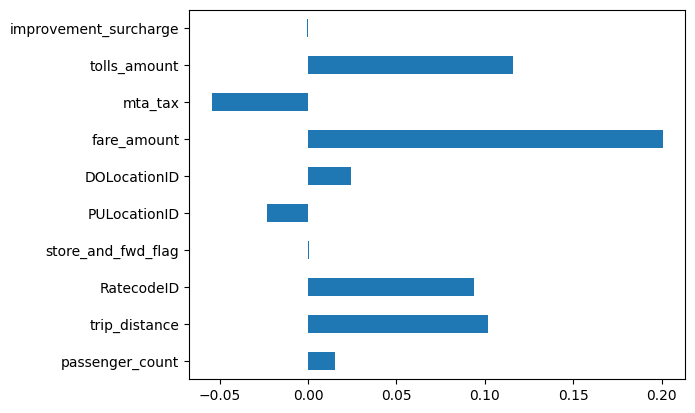

In [62]:
correlation_values = taxitip_raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind ='barh')

from the correlation we can say that, fare amount are mostly related to tip amount

### Dataset Preprocessing

In [75]:
# Applying normalization to the layers
feature_data = taxitip_raw_data.drop('tip_amount', axis = 1)

y = taxitip_raw_data[['tip_amount']].values.astype('float32')


# Get the feature values and convert it into numpy array
X = feature_data.values

# Apply normalization
from sklearn.preprocessing import normalize
X = normalize(X, norm ='l1', axis = 1, copy = False)

In [76]:
X

array([[0.00252481, 0.04451233, 0.00504961, ..., 0.0012624 , 0.01752216,
        0.00252481],
       [0.00212784, 0.04153545, 0.00425568, ..., 0.00106392, 0.01476721,
        0.00212784],
       [0.00356824, 0.0635504 , 0.00713649, ..., 0.00178412, 0.0247636 ,
        0.00356824],
       ...,
       [0.00271186, 0.04694237, 0.00542373, ..., 0.00135593, 0.01882034,
        0.00271186],
       [0.00215183, 0.03718368, 0.00430367, ..., 0.00107592, 0.01493372,
        0.00215183],
       [0.00249215, 0.04191796, 0.0049843 , ..., 0.00124607, 0.01729552,
        0.00249215]])

In [80]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)


# Create the model
from sklearn.tree import DecisionTreeRegressor

df_tree = DecisionTreeRegressor(criterion='squared_error',
                               max_depth = 12,
                               random_state = 42)

In [81]:
df_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12, random_state=42)

In [82]:
# run inference using the sklearn model
y_pred = df_tree.predict(X_test)

# Evaluate mean squarred error on the test dataset
mse_error = mean_squared_error(y_test, y_pred)
print(f"Mean Squarred Error: {mse_error:.3f}")


from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test,y_pred)
print(f"R2 Score: {r2_score_value:.3f}")

Mean Squarred Error: 26.806
R2 Score: -0.032


In [83]:
correlation_values = taxitip_raw_data.corr()['tip_amount'].drop('tip_amount')
abs(correlation_values).sort_values(ascending = False)[:3]

fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64

In [84]:
abs(correlation_values).sort_values(ascending = True)[:3]

store_and_fwd_flag       0.000320
improvement_surcharge    0.000727
passenger_count          0.015081
Name: tip_amount, dtype: float64

In [85]:
# drop the features with whom the model has minimum correlation
new_data = taxitip_raw_data.drop(columns = ['store_and_fwd_flag','improvement_surcharge', 'passenger_count' ])
new_data.sample(3)

,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,mta_tax,tolls_amount,tip_amount
35892,18.37,2,132,113,70.0,0.5,6.94,16.19
35362,18.94,2,132,262,70.0,0.5,6.94,16.19
16026,19.04,2,132,68,70.0,0.5,6.94,16.54


In [86]:
new_data.shape


(41202, 8)

In [87]:
# apply normalization
y = new_data['tip_amount']
proc = new_data.drop('tip_amount', axis = 1)

# after normalization
proc = proc.values.astype('float64')
X = normalize(proc,norm = 'l1',axis =1, copy = False)

In [89]:
X.shape

(41202, 7)

In [90]:
# Split the train_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)

In [95]:
# Create the model 
model = DecisionTreeRegressor(criterion='squared_error',
                             max_depth = 12,
                             random_state = 42)

# train the model
model.fit(X_train,y_train)

# predict
y_pred = model.predict(X_test)


mse_error = mean_squared_error(y_test, y_pred)
print(f"Mean Squarred Error: {mse_error:.3f}")


from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test,y_pred)
print(f"R2 Score: {r2_score_value:.3f}")

Mean Squarred Error: 26.354
R2 Score: -0.015


In [96]:
X_train.shape

(32961, 7)

In [97]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict
y_pred = linear_model.predict(X_test)

mse_error = mean_squared_error(y_test, y_pred)
print(f"Mean Squarred Error: {mse_error:.3f}")


from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test,y_pred)
print(f"R2 Score: {r2_score_value:.3f}")


Mean Squarred Error: 25.046
R2 Score: 0.035


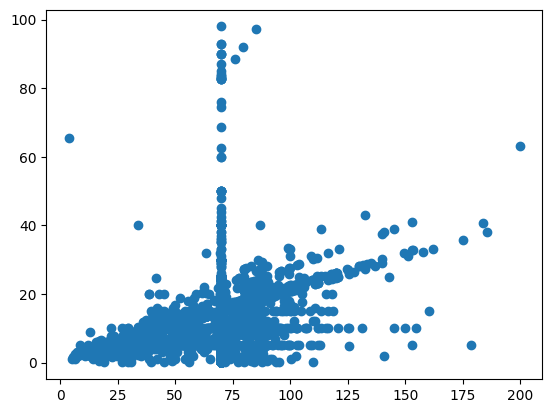

In [102]:
plt.scatter(taxitip_raw_data['fare_amount'], taxitip_raw_data['tip_amount'])